In [1]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms, datasets, models
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt
import statistics

In [2]:
#--- hyperparameters ---
N_EPOCHS = 10
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 100
LR = 0.0001

In [3]:
#--- fixed constants ---
NUM_CLASSES = 24
DATA_DIR = '../data/sign_mnist_%s'

In [4]:
# --- Dataset initialization ---

# We transform image files' contents to tensors
# Plus, we can add random transformations to the training data if we like
# Think on what kind of transformations may be meaningful for this data.
# Eg., horizontal-flip is definitely a bad idea for sign language data.
# You can use another transformation here if you find a better one.

# Grayscale + toTensor + Normalize
train_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=0.5, std=0.5, inplace=True)])

test_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=0.5, std=0.5, inplace=True)])

train_set = datasets.ImageFolder(DATA_DIR % 'train', transform=train_transform)
dev_set   = datasets.ImageFolder(DATA_DIR % 'dev',   transform=test_transform)
test_set  = datasets.ImageFolder(DATA_DIR % 'test',  transform=test_transform)


# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
dev_loader = torch.utils.data.DataLoader(dataset=dev_set, batch_size=len(dev_set), shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=False)

In [5]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        # WRITE CODE HERE
        
        # Sequential 1: Convolution + batch normalization + ReLU + maxpooling
        self.seq1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=28, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=28),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        
        # Sequential 2: Convolution + batch normalization + ReLU + maxpooling
        self.seq2 = nn.Sequential(
            nn.Conv2d(in_channels=28, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Dropout(p=0.1))
        
        # Sequential 3: Linear + ReLU + Linear
        self.seq3 = nn.Sequential(
            nn.Linear(in_features=3136, out_features=512),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=512, out_features=NUM_CLASSES))
            
    def forward(self, x):
        # WRITE CODE HERE
  
        # Sequential 1
        x = self.seq1(x)
        
        # Sequential 2
        x = self.seq2(x)
        
        # Reshape
        x = x.view(x.size(0), -1)
        
        # Sequential 3
        x = self.seq3(x)
        
        # log_softmax
        x = F.log_softmax(x, dim=1)
        
        # Return x
        return x

In [6]:
#--- set up ---

# Print Cuda info
print("Cuda is available: {} \n".format(torch.cuda.is_available()))

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

model = CNN().to(device)

# WRITE CODE HERE

# Oprimizers
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# Loss functions
loss_function = nn.CrossEntropyLoss()

# Early stopping parameters initialization
# Make empty dev lost list and add start values 0 to list
# When done=True, then end training
dev_loss_list = []
train_loss_list = []
dev_loss_list.append(100)
dev_loss_list.append(100)
dev_loss_list.append(100)
done = False
counter = 1

Cuda is available: False 



Training: Epoch 0 - Batch 0/138: Loss: 3.3063 | Train Acc: 5.500% (11/200)
Training: Epoch 0 - Batch 1/138: Loss: 3.2552 | Train Acc: 5.750% (23/400)
Training: Epoch 0 - Batch 2/138: Loss: 3.2378 | Train Acc: 7.000% (42/600)
Training: Epoch 0 - Batch 3/138: Loss: 3.2063 | Train Acc: 7.000% (56/800)
Training: Epoch 0 - Batch 4/138: Loss: 3.1847 | Train Acc: 7.300% (73/1000)
Training: Epoch 0 - Batch 5/138: Loss: 3.1436 | Train Acc: 8.583% (103/1200)
Training: Epoch 0 - Batch 6/138: Loss: 3.1140 | Train Acc: 9.786% (137/1400)
Training: Epoch 0 - Batch 7/138: Loss: 3.0946 | Train Acc: 10.125% (162/1600)
Training: Epoch 0 - Batch 8/138: Loss: 3.0619 | Train Acc: 11.278% (203/1800)
Training: Epoch 0 - Batch 9/138: Loss: 3.0357 | Train Acc: 12.250% (245/2000)
Training: Epoch 0 - Batch 10/138: Loss: 3.0125 | Train Acc: 12.864% (283/2200)
Training: Epoch 0 - Batch 11/138: Loss: 2.9915 | Train Acc: 13.583% (326/2400)
Training: Epoch 0 - Batch 12/138: Loss: 2.9685 | Train Acc: 14.385% (374/2600)

Training: Epoch 0 - Batch 102/138: Loss: 1.5561 | Train Acc: 58.039% (11956/20600)
Training: Epoch 0 - Batch 103/138: Loss: 1.5471 | Train Acc: 58.269% (12120/20800)
Training: Epoch 0 - Batch 104/138: Loss: 1.5377 | Train Acc: 58.543% (12294/21000)
Training: Epoch 0 - Batch 105/138: Loss: 1.5291 | Train Acc: 58.769% (12459/21200)
Training: Epoch 0 - Batch 106/138: Loss: 1.5202 | Train Acc: 59.037% (12634/21400)
Training: Epoch 0 - Batch 107/138: Loss: 1.5113 | Train Acc: 59.310% (12811/21600)
Training: Epoch 0 - Batch 108/138: Loss: 1.5027 | Train Acc: 59.528% (12977/21800)
Training: Epoch 0 - Batch 109/138: Loss: 1.4937 | Train Acc: 59.805% (13157/22000)
Training: Epoch 0 - Batch 110/138: Loss: 1.4859 | Train Acc: 60.018% (13324/22200)
Training: Epoch 0 - Batch 111/138: Loss: 1.4771 | Train Acc: 60.272% (13501/22400)
Training: Epoch 0 - Batch 112/138: Loss: 1.4692 | Train Acc: 60.509% (13675/22600)
Training: Epoch 0 - Batch 113/138: Loss: 1.4616 | Train Acc: 60.702% (13840/22800)
Trai

Training: Epoch 1 - Batch 65/138: Loss: 0.3308 | Train Acc: 92.371% (12193/13200)
Training: Epoch 1 - Batch 66/138: Loss: 0.3294 | Train Acc: 92.403% (12382/13400)
Training: Epoch 1 - Batch 67/138: Loss: 0.3278 | Train Acc: 92.434% (12571/13600)
Training: Epoch 1 - Batch 68/138: Loss: 0.3268 | Train Acc: 92.471% (12761/13800)
Training: Epoch 1 - Batch 69/138: Loss: 0.3266 | Train Acc: 92.471% (12946/14000)
Training: Epoch 1 - Batch 70/138: Loss: 0.3250 | Train Acc: 92.521% (13138/14200)
Training: Epoch 1 - Batch 71/138: Loss: 0.3241 | Train Acc: 92.535% (13325/14400)
Training: Epoch 1 - Batch 72/138: Loss: 0.3228 | Train Acc: 92.568% (13515/14600)
Training: Epoch 1 - Batch 73/138: Loss: 0.3217 | Train Acc: 92.615% (13707/14800)
Training: Epoch 1 - Batch 74/138: Loss: 0.3205 | Train Acc: 92.653% (13898/15000)
Training: Epoch 1 - Batch 75/138: Loss: 0.3193 | Train Acc: 92.678% (14087/15200)
Training: Epoch 1 - Batch 76/138: Loss: 0.3184 | Train Acc: 92.695% (14275/15400)
Training: Epoch 

Training: Epoch 2 - Batch 28/138: Loss: 0.1379 | Train Acc: 97.431% (5651/5800)
Training: Epoch 2 - Batch 29/138: Loss: 0.1386 | Train Acc: 97.450% (5847/6000)
Training: Epoch 2 - Batch 30/138: Loss: 0.1377 | Train Acc: 97.452% (6042/6200)
Training: Epoch 2 - Batch 31/138: Loss: 0.1375 | Train Acc: 97.484% (6239/6400)
Training: Epoch 2 - Batch 32/138: Loss: 0.1367 | Train Acc: 97.515% (6436/6600)
Training: Epoch 2 - Batch 33/138: Loss: 0.1361 | Train Acc: 97.529% (6632/6800)
Training: Epoch 2 - Batch 34/138: Loss: 0.1357 | Train Acc: 97.514% (6826/7000)
Training: Epoch 2 - Batch 35/138: Loss: 0.1356 | Train Acc: 97.500% (7020/7200)
Training: Epoch 2 - Batch 36/138: Loss: 0.1347 | Train Acc: 97.554% (7219/7400)
Training: Epoch 2 - Batch 37/138: Loss: 0.1337 | Train Acc: 97.618% (7419/7600)
Training: Epoch 2 - Batch 38/138: Loss: 0.1338 | Train Acc: 97.603% (7613/7800)
Training: Epoch 2 - Batch 39/138: Loss: 0.1328 | Train Acc: 97.638% (7811/8000)
Training: Epoch 2 - Batch 40/138: Loss: 

Training: Epoch 2 - Batch 128/138: Loss: 0.1058 | Train Acc: 98.302% (25362/25800)
Training: Epoch 2 - Batch 129/138: Loss: 0.1058 | Train Acc: 98.300% (25558/26000)
Training: Epoch 2 - Batch 130/138: Loss: 0.1056 | Train Acc: 98.309% (25757/26200)
Training: Epoch 2 - Batch 131/138: Loss: 0.1054 | Train Acc: 98.314% (25955/26400)
Training: Epoch 2 - Batch 132/138: Loss: 0.1050 | Train Acc: 98.316% (26152/26600)
Training: Epoch 2 - Batch 133/138: Loss: 0.1047 | Train Acc: 98.325% (26351/26800)
Training: Epoch 2 - Batch 134/138: Loss: 0.1044 | Train Acc: 98.337% (26551/27000)
Training: Epoch 2 - Batch 135/138: Loss: 0.1042 | Train Acc: 98.342% (26749/27200)
Training: Epoch 2 - Batch 136/138: Loss: 0.1039 | Train Acc: 98.350% (26948/27400)
Training: Epoch 2 - Batch 137/138: Loss: 0.1037 | Train Acc: 98.346% (27001/27455)
Training: Epoch 3 - Batch 0/138: Loss: 0.0656 | Train Acc: 99.000% (198/200)
Training: Epoch 3 - Batch 1/138: Loss: 0.0668 | Train Acc: 99.250% (397/400)
Training: Epoch 

Training: Epoch 3 - Batch 91/138: Loss: 0.0592 | Train Acc: 99.239% (18260/18400)
Training: Epoch 3 - Batch 92/138: Loss: 0.0591 | Train Acc: 99.237% (18458/18600)
Training: Epoch 3 - Batch 93/138: Loss: 0.0590 | Train Acc: 99.239% (18657/18800)
Training: Epoch 3 - Batch 94/138: Loss: 0.0589 | Train Acc: 99.242% (18856/19000)
Training: Epoch 3 - Batch 95/138: Loss: 0.0587 | Train Acc: 99.250% (19056/19200)
Training: Epoch 3 - Batch 96/138: Loss: 0.0587 | Train Acc: 99.247% (19254/19400)
Training: Epoch 3 - Batch 97/138: Loss: 0.0586 | Train Acc: 99.255% (19454/19600)
Training: Epoch 3 - Batch 98/138: Loss: 0.0584 | Train Acc: 99.258% (19653/19800)
Training: Epoch 3 - Batch 99/138: Loss: 0.0583 | Train Acc: 99.265% (19853/20000)
Training: Epoch 3 - Batch 100/138: Loss: 0.0580 | Train Acc: 99.267% (20052/20200)
Training: Epoch 3 - Batch 101/138: Loss: 0.0579 | Train Acc: 99.270% (20251/20400)
Training: Epoch 3 - Batch 102/138: Loss: 0.0577 | Train Acc: 99.277% (20451/20600)
Training: Epo

Training: Epoch 4 - Batch 54/138: Loss: 0.0378 | Train Acc: 99.573% (10953/11000)
Training: Epoch 4 - Batch 55/138: Loss: 0.0378 | Train Acc: 99.562% (11151/11200)
Training: Epoch 4 - Batch 56/138: Loss: 0.0378 | Train Acc: 99.561% (11350/11400)
Training: Epoch 4 - Batch 57/138: Loss: 0.0376 | Train Acc: 99.569% (11550/11600)
Training: Epoch 4 - Batch 58/138: Loss: 0.0374 | Train Acc: 99.576% (11750/11800)
Training: Epoch 4 - Batch 59/138: Loss: 0.0373 | Train Acc: 99.583% (11950/12000)
Training: Epoch 4 - Batch 60/138: Loss: 0.0372 | Train Acc: 99.574% (12148/12200)
Training: Epoch 4 - Batch 61/138: Loss: 0.0372 | Train Acc: 99.581% (12348/12400)
Training: Epoch 4 - Batch 62/138: Loss: 0.0372 | Train Acc: 99.579% (12547/12600)
Training: Epoch 4 - Batch 63/138: Loss: 0.0371 | Train Acc: 99.586% (12747/12800)
Training: Epoch 4 - Batch 64/138: Loss: 0.0371 | Train Acc: 99.585% (12946/13000)
Training: Epoch 4 - Batch 65/138: Loss: 0.0370 | Train Acc: 99.591% (13146/13200)
Training: Epoch 

Training: Epoch 5 - Batch 16/138: Loss: 0.0241 | Train Acc: 99.794% (3393/3400)
Training: Epoch 5 - Batch 17/138: Loss: 0.0237 | Train Acc: 99.806% (3593/3600)
Training: Epoch 5 - Batch 18/138: Loss: 0.0245 | Train Acc: 99.763% (3791/3800)
Training: Epoch 5 - Batch 19/138: Loss: 0.0240 | Train Acc: 99.775% (3991/4000)
Training: Epoch 5 - Batch 20/138: Loss: 0.0240 | Train Acc: 99.786% (4191/4200)
Training: Epoch 5 - Batch 21/138: Loss: 0.0242 | Train Acc: 99.795% (4391/4400)
Training: Epoch 5 - Batch 22/138: Loss: 0.0240 | Train Acc: 99.804% (4591/4600)
Training: Epoch 5 - Batch 23/138: Loss: 0.0239 | Train Acc: 99.812% (4791/4800)
Training: Epoch 5 - Batch 24/138: Loss: 0.0238 | Train Acc: 99.820% (4991/5000)
Training: Epoch 5 - Batch 25/138: Loss: 0.0237 | Train Acc: 99.827% (5191/5200)
Training: Epoch 5 - Batch 26/138: Loss: 0.0240 | Train Acc: 99.815% (5390/5400)
Training: Epoch 5 - Batch 27/138: Loss: 0.0239 | Train Acc: 99.821% (5590/5600)
Training: Epoch 5 - Batch 28/138: Loss: 

Training: Epoch 5 - Batch 117/138: Loss: 0.0227 | Train Acc: 99.801% (23553/23600)
Training: Epoch 5 - Batch 118/138: Loss: 0.0227 | Train Acc: 99.803% (23753/23800)
Training: Epoch 5 - Batch 119/138: Loss: 0.0227 | Train Acc: 99.804% (23953/24000)
Training: Epoch 5 - Batch 120/138: Loss: 0.0227 | Train Acc: 99.806% (24153/24200)
Training: Epoch 5 - Batch 121/138: Loss: 0.0229 | Train Acc: 99.791% (24349/24400)
Training: Epoch 5 - Batch 122/138: Loss: 0.0228 | Train Acc: 99.793% (24549/24600)
Training: Epoch 5 - Batch 123/138: Loss: 0.0227 | Train Acc: 99.794% (24749/24800)
Training: Epoch 5 - Batch 124/138: Loss: 0.0226 | Train Acc: 99.796% (24949/25000)
Training: Epoch 5 - Batch 125/138: Loss: 0.0226 | Train Acc: 99.794% (25148/25200)
Training: Epoch 5 - Batch 126/138: Loss: 0.0226 | Train Acc: 99.795% (25348/25400)
Training: Epoch 5 - Batch 127/138: Loss: 0.0226 | Train Acc: 99.797% (25548/25600)
Training: Epoch 5 - Batch 128/138: Loss: 0.0226 | Train Acc: 99.798% (25748/25800)
Trai

Training: Epoch 6 - Batch 80/138: Loss: 0.0168 | Train Acc: 99.889% (16182/16200)
Training: Epoch 6 - Batch 81/138: Loss: 0.0168 | Train Acc: 99.884% (16381/16400)
Training: Epoch 6 - Batch 82/138: Loss: 0.0167 | Train Acc: 99.886% (16581/16600)
Training: Epoch 6 - Batch 83/138: Loss: 0.0166 | Train Acc: 99.887% (16781/16800)
Training: Epoch 6 - Batch 84/138: Loss: 0.0166 | Train Acc: 99.882% (16980/17000)
Training: Epoch 6 - Batch 85/138: Loss: 0.0166 | Train Acc: 99.884% (17180/17200)
Training: Epoch 6 - Batch 86/138: Loss: 0.0165 | Train Acc: 99.885% (17380/17400)
Training: Epoch 6 - Batch 87/138: Loss: 0.0165 | Train Acc: 99.886% (17580/17600)
Training: Epoch 6 - Batch 88/138: Loss: 0.0164 | Train Acc: 99.888% (17780/17800)
Training: Epoch 6 - Batch 89/138: Loss: 0.0163 | Train Acc: 99.889% (17980/18000)
Training: Epoch 6 - Batch 90/138: Loss: 0.0163 | Train Acc: 99.890% (18180/18200)
Training: Epoch 6 - Batch 91/138: Loss: 0.0164 | Train Acc: 99.886% (18379/18400)
Training: Epoch 

Training: Epoch 7 - Batch 43/138: Loss: 0.0132 | Train Acc: 99.886% (8790/8800)
Training: Epoch 7 - Batch 44/138: Loss: 0.0132 | Train Acc: 99.889% (8990/9000)
Training: Epoch 7 - Batch 45/138: Loss: 0.0131 | Train Acc: 99.891% (9190/9200)
Training: Epoch 7 - Batch 46/138: Loss: 0.0131 | Train Acc: 99.894% (9390/9400)
Training: Epoch 7 - Batch 47/138: Loss: 0.0131 | Train Acc: 99.885% (9589/9600)
Training: Epoch 7 - Batch 48/138: Loss: 0.0131 | Train Acc: 99.888% (9789/9800)
Training: Epoch 7 - Batch 49/138: Loss: 0.0132 | Train Acc: 99.880% (9988/10000)
Training: Epoch 7 - Batch 50/138: Loss: 0.0131 | Train Acc: 99.882% (10188/10200)
Training: Epoch 7 - Batch 51/138: Loss: 0.0130 | Train Acc: 99.885% (10388/10400)
Training: Epoch 7 - Batch 52/138: Loss: 0.0131 | Train Acc: 99.887% (10588/10600)
Training: Epoch 7 - Batch 53/138: Loss: 0.0131 | Train Acc: 99.889% (10788/10800)
Training: Epoch 7 - Batch 54/138: Loss: 0.0130 | Train Acc: 99.891% (10988/11000)
Training: Epoch 7 - Batch 55/

Training: Epoch 8 - Batch 5/138: Loss: 0.0095 | Train Acc: 100.000% (1200/1200)
Training: Epoch 8 - Batch 6/138: Loss: 0.0097 | Train Acc: 100.000% (1400/1400)
Training: Epoch 8 - Batch 7/138: Loss: 0.0097 | Train Acc: 100.000% (1600/1600)
Training: Epoch 8 - Batch 8/138: Loss: 0.0103 | Train Acc: 100.000% (1800/1800)
Training: Epoch 8 - Batch 9/138: Loss: 0.0104 | Train Acc: 99.950% (1999/2000)
Training: Epoch 8 - Batch 10/138: Loss: 0.0107 | Train Acc: 99.955% (2199/2200)
Training: Epoch 8 - Batch 11/138: Loss: 0.0103 | Train Acc: 99.958% (2399/2400)
Training: Epoch 8 - Batch 12/138: Loss: 0.0103 | Train Acc: 99.962% (2599/2600)
Training: Epoch 8 - Batch 13/138: Loss: 0.0100 | Train Acc: 99.964% (2799/2800)
Training: Epoch 8 - Batch 14/138: Loss: 0.0101 | Train Acc: 99.967% (2999/3000)
Training: Epoch 8 - Batch 15/138: Loss: 0.0103 | Train Acc: 99.969% (3199/3200)
Training: Epoch 8 - Batch 16/138: Loss: 0.0100 | Train Acc: 99.971% (3399/3400)
Training: Epoch 8 - Batch 17/138: Loss: 0

Training: Epoch 8 - Batch 106/138: Loss: 0.0098 | Train Acc: 99.953% (21390/21400)
Training: Epoch 8 - Batch 107/138: Loss: 0.0098 | Train Acc: 99.954% (21590/21600)
Training: Epoch 8 - Batch 108/138: Loss: 0.0098 | Train Acc: 99.954% (21790/21800)
Training: Epoch 8 - Batch 109/138: Loss: 0.0098 | Train Acc: 99.955% (21990/22000)
Training: Epoch 8 - Batch 110/138: Loss: 0.0098 | Train Acc: 99.955% (22190/22200)
Training: Epoch 8 - Batch 111/138: Loss: 0.0098 | Train Acc: 99.955% (22390/22400)
Training: Epoch 8 - Batch 112/138: Loss: 0.0098 | Train Acc: 99.956% (22590/22600)
Training: Epoch 8 - Batch 113/138: Loss: 0.0098 | Train Acc: 99.952% (22789/22800)
Training: Epoch 8 - Batch 114/138: Loss: 0.0098 | Train Acc: 99.952% (22989/23000)
Training: Epoch 8 - Batch 115/138: Loss: 0.0098 | Train Acc: 99.953% (23189/23200)
Training: Epoch 8 - Batch 116/138: Loss: 0.0098 | Train Acc: 99.953% (23389/23400)
Training: Epoch 8 - Batch 117/138: Loss: 0.0098 | Train Acc: 99.953% (23589/23600)
Trai

Training: Epoch 9 - Batch 69/138: Loss: 0.0088 | Train Acc: 99.943% (13992/14000)
Training: Epoch 9 - Batch 70/138: Loss: 0.0088 | Train Acc: 99.944% (14192/14200)
Training: Epoch 9 - Batch 71/138: Loss: 0.0088 | Train Acc: 99.944% (14392/14400)
Training: Epoch 9 - Batch 72/138: Loss: 0.0087 | Train Acc: 99.945% (14592/14600)
Training: Epoch 9 - Batch 73/138: Loss: 0.0088 | Train Acc: 99.939% (14791/14800)
Training: Epoch 9 - Batch 74/138: Loss: 0.0088 | Train Acc: 99.940% (14991/15000)
Training: Epoch 9 - Batch 75/138: Loss: 0.0088 | Train Acc: 99.941% (15191/15200)
Training: Epoch 9 - Batch 76/138: Loss: 0.0088 | Train Acc: 99.942% (15391/15400)
Training: Epoch 9 - Batch 77/138: Loss: 0.0088 | Train Acc: 99.942% (15591/15600)
Training: Epoch 9 - Batch 78/138: Loss: 0.0087 | Train Acc: 99.943% (15791/15800)
Training: Epoch 9 - Batch 79/138: Loss: 0.0087 | Train Acc: 99.944% (15991/16000)
Training: Epoch 9 - Batch 80/138: Loss: 0.0087 | Train Acc: 99.944% (16191/16200)
Training: Epoch 

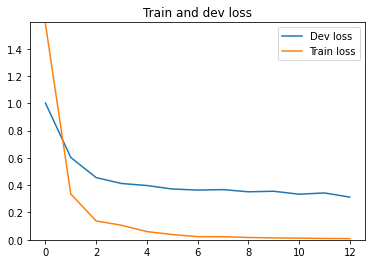

In [7]:
#--- training ---

for epoch in range(N_EPOCHS):
    
    # If done=True, stop training
    if done:
        break
        
    # Initialize values
    train_loss = 0
    train_correct = 0
    total = 0
    
    for batch_num, (data, target) in enumerate(train_loader):
        
        # If done=True, stop training
        if done:
            break
            
        # Get data and target
        data, target = data.to(device), target.to(device)
            
        # Sum of sizes
        total += target.size(0)
        
        # Get prediction values
        outputs = model(data)
        
        # Get prediction labels
        _, predicted = torch.max(outputs, 1)
        
        # Sum of number of correct predictions
        train_correct += (predicted == target).sum().item()
        
        # Calculate loss
        loss=loss_function(outputs, target)
        
        # Backward + optimizer step
        loss.backward()
        optimizer.step()
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Print statistics
        train_loss+=loss
        print('Training: Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % 
              (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 
               100. * train_correct / total, train_correct, total))
        
# -- Check development set accuracy and stop training if it start to decline

    # WRITE CODE HERE
    # Please implement early stopping here.
    # You can try different versions, simplest way is to calculate the dev error and
    # compare this with the previous dev error, stopping if the error has grown.

    
    # In the early stopping we compare latest dev loss to previous last 3 dev losses
    # To make training more efficiont, we will compute dev loss once in every 100 iterations
    # If latest dev loss is larger than all previous 3, then end training
        if (counter%100 == 0):
            train_loss_list.append(float(train_loss / (batch_num + 1)))
            for dev_batch_num, (dev_data, dev_target) in enumerate(dev_loader):
                dev_data, dev_target = dev_data.to(device), dev_target.to(device)
                dev_outputs = model(dev_data)
                _, dev_predicted = torch.max(dev_outputs, 1)   
                dev_loss=loss_function(dev_outputs, dev_target)
                dev_loss = float(dev_loss)      
                print("\nDev loss: {} \n".format(round(dev_loss, 5)))
                
                # Save dev loss to list
                dev_loss_list.append(dev_loss)
        
                # If the latest dev correct accuracy is smaller than the last 3 values, then end training
                dev_last_three = dev_loss_list[-4:-1]
                if dev_loss > max(dev_last_three):
                    print("Dev accuracy declining. Activate early stopping. \n")
                    done = True
                    break
    
        # Add 1 to counter
        counter = counter+1

# Remove initialized first three values from dev_correct_list
dev_loss_list = dev_loss_list[3:]

# Plot dev correct
plt.plot(dev_loss_list, label = "Dev loss")
plt.plot(train_loss_list, label = "Train loss")
plt.ylim((0, max(dev_loss_list+train_loss_list)+0.01))
plt.title("Train and dev loss")
plt.legend()
plt.show()

In [8]:
#--- test ---
test_loss = 0
test_correct = 0
total = 0
test_acc_list=[]

with torch.no_grad():
    for batch_num, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        # WRITE CODE HERE
        outputs=model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        test_correct += (predicted == target).sum()
        loss=loss_function(outputs, target)
        test_loss+=loss
        
        test_acc_list.append(100 * float(test_correct) / float(total))
        
        print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % 
              (batch_num, len(test_loader), test_loss / (batch_num + 1), 
               100. * test_correct / total, test_correct, total))

print("\nAverage test accuracy", round(statistics.mean(test_acc_list), 2), "%")

Evaluating: Batch 0/19: Loss: 0.0434 | Test Acc: 98.500% (197/200)
Evaluating: Batch 1/19: Loss: 0.0621 | Test Acc: 98.250% (393/400)
Evaluating: Batch 2/19: Loss: 0.1231 | Test Acc: 96.667% (580/600)
Evaluating: Batch 3/19: Loss: 0.1191 | Test Acc: 96.750% (774/800)
Evaluating: Batch 4/19: Loss: 0.1110 | Test Acc: 96.900% (969/1000)
Evaluating: Batch 5/19: Loss: 0.1208 | Test Acc: 96.167% (1154/1200)
Evaluating: Batch 6/19: Loss: 0.1483 | Test Acc: 95.357% (1335/1400)
Evaluating: Batch 7/19: Loss: 0.1656 | Test Acc: 94.688% (1515/1600)
Evaluating: Batch 8/19: Loss: 0.1957 | Test Acc: 94.111% (1694/1800)
Evaluating: Batch 9/19: Loss: 0.1957 | Test Acc: 94.100% (1882/2000)
Evaluating: Batch 10/19: Loss: 0.2368 | Test Acc: 92.682% (2039/2200)
Evaluating: Batch 11/19: Loss: 0.2634 | Test Acc: 91.792% (2203/2400)
Evaluating: Batch 12/19: Loss: 0.2491 | Test Acc: 92.308% (2400/2600)
Evaluating: Batch 13/19: Loss: 0.2588 | Test Acc: 92.000% (2576/2800)
Evaluating: Batch 14/19: Loss: 0.3110 |